<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling-random-variables" data-toc-modified-id="Sampling-random-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling random variables</a></span></li><li><span><a href="#Coin-toss" data-toc-modified-id="Coin-toss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coin toss</a></span></li><li><span><a href="#Monty-Hall-problem" data-toc-modified-id="Monty-Hall-problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monty Hall problem</a></span></li><li><span><a href="#Compute-$\pi$" data-toc-modified-id="Compute-$\pi$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute $\pi$</a></span></li><li><span><a href="#Stochastic-processes" data-toc-modified-id="Stochastic-processes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stochastic processes</a></span><ul class="toc-item"><li><span><a href="#Random-walk" data-toc-modified-id="Random-walk-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Random walk</a></span></li><li><span><a href="#Snakes-&amp;-ladders" data-toc-modified-id="Snakes-&amp;-ladders-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Snakes &amp; ladders</a></span><ul class="toc-item"><li><span><a href="#Snakes-&amp;-ladders-with-infinite-tree" data-toc-modified-id="Snakes-&amp;-ladders-with-infinite-tree-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Snakes &amp; ladders with infinite tree</a></span></li></ul></li></ul></li><li><span><a href="#Num-typeclass" data-toc-modified-id="Num-typeclass-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><code>Num</code> typeclass</a></span></li></ul></div>

We will use [HaskellR](https://github.com/tweag/HaskellR) to have some nice plots when needed

In [1]:
:ext QuasiQuotes

In [2]:
import qualified H.Prelude as H
import Control.Monad
H.initialize H.defaultConfig

# Sampling random variables

In [3]:
import Data.Random

Let us remind types:

```haskell
sample     :: MonadRandom  m   => RVar a -> m a
sampleFrom :: RandomSource m s => s -> RVar a -> m a
```

for sampling and
```haskell
instance Distribution StdUniform Double
instance Distribution Normal Double

stdUniform :: Distribution StdUniform a => RVar a
normal     :: Distribution Normal a     => a -> a -> RVar a
```

we can now try to sample few values:

In [4]:
sample stdUniform :: IO Double

0.299802347190548

In [5]:
sample stdUniform :: IO Bool

True

In [6]:
sample stdNormal :: IO Double

0.6153120488288605

Since `RVar` is a monad, we can use the whole variety of functions that manimulate monadic values, e.g.:

```haskell
replicateM :: Monad m => Int -> m a -> m [a]

-- specialized for us
replicateM :: Int -> RVar a -> RVar [a]
```

to construct a random variable of list type.

In [7]:
sample $ replicateM 10 stdUniform :: IO [Double]

[0.6617812500255484,0.33461841673128756,0.538487826343752,0.42051141922913726,0.6262004620875876,0.5555609056683142,0.820833067850679,0.9083264625261627,6.205129775473939e-4,0.19976866020911932]

In [8]:
sample $ replicateM 10 stdNormal :: IO [Double]

[-1.0497938968195875,-0.3254564495767231,-1.095558574291609,-0.650311007410181,-0.6067185406472032,-1.405644926710861,-0.13160962220268171,-1.1043104628555174,-0.21885941028371245,-0.3607038869390136]

This tells us nothing. But let's do some simple plots:

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC4lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICCgoKDg4OFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////BptE8AAATRElEQVR4nO3dfXxU1Z3H8RPQhTyRYFxYSAkVCFgoiZCCKAawobo8CCq4LbVKu9aqRdCCrWuj0opiqdBaadbabVcKRej6sEYeUtSwi21BW4cFIiIIhQQizwSSnP/3zj3J3DnnzM3MnLlJ7v3N9/N6CXn97r1nLnnLZG4SchlHpGPdfQKocwMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATLxAA19ibK/12zT2FGfskler/qm4x0r3redZT68eqEuiCFzGalNZ9U42scZ9K4C7sCjg06dbI+MUgaex9R1sBXAX5gDb7/a3b8i5cvoHli9jL/NTDw7LKq2y1I/f0XfM71kZP8IK3i1bx6uvzcm/8T2+lw1ZMbDoudox2ZPqxGLtB4QP/7fwoO2AtlXbsx7pzZLc2xq5usGnBR346tLS0lwBXN8n45ZyNvDs659nj+9vncwGTctkz/LW69iY2b1s4OxBbN0nmT0nj2ODWvcy9g8jrP+GZrPZ9lqRA14vZQ/+JTwRB7Sv2v6Y5xnrPbIHW8zVDT4t6MAiG3gTK/47X3jbXvspegsbdIrXsLyWrezqJv6EDcyeariw9aYneVNvdswCDvFy9tXWzWyovVbkAOsJYYM9EQdEVm3LAl7PV7AbuLrBpwUdOOopuuEKljH+iSPiY/Aqdr+1pZAdWMkWcv43G7h3izX6vx/NKmLsyF5WyPk8VmU9Vw+214ocEAUcPiCyalvnWUYzf8daT93g0wgB88Ynr2Gsz54o4CJW9zR7kPO/io/B1uTdy7PmvZATBh4cBn5JAbYOiAIOHxBZtS37kWqt9dQNPo0Q8Pq7fsM/vo6ttIDf5ptZ0Sm+jfVp2ciGnuGLI8DfY0v4n1gM4MgBCnBk1bYiwOoGn0YIeBPrPfv2LLbV+tB6619by1nR9Cz2E940hA2yXhi3Ay9neTP6ZbBDGnDkAAU4smpbEWB1g08jBMzXjOuTVfIS56/0ty6TTi4YklX6onWZVDc1d+QvI8Bnbs36wn9OZqs1YOcA5Sm6fdW2nKdoZYNPCzRwIjXU7gqD3NTd59FdkQfec1lG5Ypi9mJ3n0d3RR6YV5fnZV9T1Rp/xw7b0H7Jvc6Tk+q66AOneQAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHjdDVyzTKu+m0+JVt0NfO9L1Upf7+Bn+aKk63bg3eqksiuBT59Q8/sPF022NAcumqM2tgsfvStKc+DJCUyCHYDjToIdgONOgh2A406CHYDjTryqWXvF3thpj+UE4LgTr/p5aYXSF7vgZ9UCOO7Eq1ZsVCe/Xd1pDxYpIeCWky2d9fieAX+mPQE2J3BUIsBLtWvlu4zusuZX4POVxZexnsMev9Apj+8V8Par1Oe/6xYkcFgiwOV1alPOmJyiX4HvnLq14eLxd2Z/04NH26d+4rl65t/UfcyAayrVye57EzgsEWB9Mo0UcN5h+7ezV3rwaLMWPqJU8N/qPgD2tPjApb+yf3tljAePNku7MBj5hjoBsKfFB94xYOTcb80dPXCHB4+WRsDH3lN7aK26jz+A+aXq1ctWV3tye940Av7+nepHo+JH1X18AuzhZVI6AWu3uL3lB+okEeAzv1ytti3+UU5de5kEYKlEgN+/ea1S1dz4Rzl17WUSgKUSAtYu5496DKxfJu0UzxRPJ39XNzPgfx+tfhKjpErdxzPgHPWxKjK1fWgB65dJe8RTxaIfJ/NAdmbAP9defq77mTrxDDg/gQktYNfLpN89n8wD2QFYSgfe/22126ep+3gN7HqZpACXac9tRdohAJbSgasfUj/v/YtSdR/PgcMdi/G1aQU4kVcniQDfco36P8rQpeo+3Qz85W3qJzH+rN06zxBY+6Ou73Tg6Z/wg9f2uHzKp+qGTgIuX6VO5i5SJ2bAF+/XngCHaaeYCHC/BeonMUo+UvcJDnCvEJ9799mLS2arGwIH3DhV+8JfIpwxgI+qk2/WqZNAAQ/Zbb13+qgbggc8SzshAFvAmy/NeJ3zPw5UNwDYKcjAU4t65V/Nt+SvUDcA2MkMeNEA9fVk8c3qPp0PbL042fc2375FGwPYyQz4ga+rk2e+rE66AtglADsBWARgKQCLACyVDsDPXa9+xmLGN9R9AGwXTOCHpqqfK1xcru7TpcAzf6R+28U/b1L3oQdcWKZWcETdxxB4jjpZ1b3AxQ+rwEOq1H3oAevvmQH71QkVYO2bH66tUicAFgFYCsAiHTh0u/pxeov2aSIAd5TPgd/sq77S/tqABE4RwJF8DvzGSHXyMYCTCsBOABYBWArAIgBLAVgEYDsAG0wALAKwFIBFAJYCsAjALgHYYAJgEYClACwCsBSARQB2CcAGEwCLACwFYBGApQAsArBLADaYAFgEYCkAiwAsBWARgF0CsMEEwCIASwFYBGApAIsA7BKADSYAFgFYCsAiAEsBWARglwBsMCEHHPuuKwB2CjKw611XAOwUZGDXu64A2CnIwK43pwSwU5CBXW9OCWCnIAMnetcVAEsFBzjRu64AWCpAwLhMUqMFjMskbUILWL9MOlht99jT0n4AlgoOsH6ZtH2Z3dd+KO0HYKngAOMySZvQAsZlkjahBYzLJG1CDNiuVnsRDeCogg9ccFAbAdgpyMDZPcOxHj3VDQB2CjLwhxPm1NXX991Vr24AsFOQgXnzT0e8hqfo6IgBc75vyrxcADuRA+Ytq+9o0IYAdgo6cMwA7ARgEYClACwCsBSARQC2A7DBBMAiAEsBWARgKQCLAOwSgA0mABYBWArAIgBLAVgEYJcAbDAB
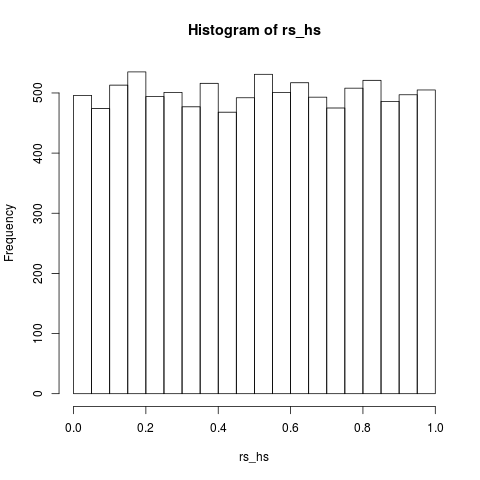

In [9]:
rs <- sample $ replicateM 10000 stdUniform :: IO [Double]  -- get bigger sample
[rgraph|hist(rs_hs)|]  -- plot histogram with R

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC1lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKVlZWYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW3t7e5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/x8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////WpfoHAAASDklEQVR4nO3djX9U1Z3H8QPBAgkhkbCyBIltSAChYUypBR9AcJPtImujbdzWZYuwtlpLpV2htW2w2q2pKFutWaTdB63Ig1tpRyC4QOwGtz5tY4UUladiEhI0hmRIzn+wk8nJeHLPmcy9M/ck93fm+3m9YF6ec+/Jdd6vTOaQmYRxZHVstC8AmQ3AlgdgywOw5QHY8gBseQC2PABbHoAtD8CWB2DLA7DlAdjyAGx5ALY8AFsegC0PwJYHYMsDsOUB2PIAbHkAtjzSwBHGjkZvVrCHOWMRv1Z9pXTs44lnu1iWXx9oRLIReCFrSGfVVez6A4lnATyCScAffNAXH04TeAXbMcwsgEewj4Fjd/vBJZOm3vRG1Jexp/n5e0uyQ1uj6m23XVr+HFvIz7CCwwu38/DiSfk3HuFHWfGWwqKfNZTn3NA8sNjgCf2nf79/QJwgVh0s+pF+uyD31nbunAho1IHnhkKh3AHglsljbl7KCjv3fJJtOt63jM1cMZE9yvuuZeVV42PAOTPZ9vcmZi27ms3sO8rYJ+ZE/8zKYVWxteIn7Amxe3/fPzJwwuCqgx+zi7EJ88ay+7hzIqBRBx4oBryXlf6Zr7/1aOwhej+beZ4fYHm99WxuN38gBswebr1Q//kHefcE9n4UuIkvZV/u28dmxdaKnxB9QNgVGxk4Ib6qKAq8g29hS7hzIqBRB5YeolunsDGLHjgz8DX4CfaN6MwM9u7jbD3n/xcDntAbHfrjP3+hiLEzR9kMzm9nW6OP1VfE1oqfIAH3nxBfVdTFxlzkh6LrOScCmkXAvP3Bqxib/LYEXMSaf8ru5fzNga/B0ZHDl2Tf/uSkfuAr+oF/4QCOniAB958QX1UU+0gN0fWcEwHNIuAdX/13/s617PEo8EG+jxWd5//NJvfuZrM+5PfFgf+JbeCvMA1w/AQHcHxVURzYORHQLALeyyZUfTGb1Ue/tN7yZt9SVnRTNnuMdxezmdEnxoPAm1neysvGsJMKcPwEB3B8VVEc2DkR0CwC5s9cPTl7wS843zktuk3qWFecHXoquk1qrsyd969x4A9vyb7yP5exOgX44xMcD9GDq4o+foh2TAQ00sBuam14rR/k86N9HaOV9cBvjxtTs6WUPTXa1zFaWQ/Mw0vzcq7a2pf8wGHbNbjl3u7LRY1c9gNneAC2PABbHoAtD8CWB2DLA7DluQLu7eg1fR3IUMmBu2pKx7Gskk0XRuBqkO8lB15VWd/a03aoas0IXA3yveTAeadjN51TTV8KMlFy4NC22M3OcsNXgoyUHLhx+rzqtdVlhY0jcDXI91w8i46E62rrwr69MwSNaNgmWR62SZaHbZLlYZtkedgmWR62SZaXyjbp3JFYh9vMXRbyq1S2SeGvxar4vplLQn6WxjbpVz83ckXI19LYJgGYQmlskwBMoTS2SQCmUBrbJABTKI3vJgGYQm62Sef637l1scU5DGAKJQf+w/wxxb/m/LhyJIAplBx46Q+7D8w4AmCiJQeeeJ7z3Z+9CGCaJQee/QLnfV+4H8A0Sw68a9L1Z3lLechy4Hdqde0Z7ctKOxfPos/sij5IX3hmg3PcLuBffSus9vzfjvZlpV0abz6zDFj3f9MBYGsCsBKAKQRgEYCVAEwhAIsArARgCmUi8H1LKtSKV2uOBDDJ1jRrBtffphkEMMkA7C4AUwjAIgArAZhCABYBWAnAFAKwCMBKAKYQgEUAVgIwhQAsArASgCkEYBGAlQBMIQCLAKwEYAoBWARgJQBTCMAiACsBmEIAFgFYCcAUArAIwEoAphCARQBWAjCFACwCsBKAKQRgEYCVAEwhAIsArARgCgFYBGAlAFMIwCIAKwGYQgAWAVgJwBQCsAjASgCmEIBFAFYCMIUALAKwEoApBGARgJUATCEAizIauLejVzMKYAolB+6qKR3Hsko2XXBOAJhCyYFXVda39rQdqlrjnAAwhZID552O3XROdU4AmELJgUPbYjc7y50TAKZQcuDG6fOq11aXFTY6JwBMIRfPoiPhutq6cEQZBzCFsE0SZS4wtkmkwzZJlLnA2CaRDtskUeYCY5tEulS2Sfs3xrr5fnOXZTQAq73fLv1Hy5FYDz9m5IrMB+Ah3fQeP7F47CXLTzkn8BBNoeTA45t49erOng1VzgkKwH88ounmY5ojMxq4+C3O2yc7JygAl23UNKVec2QGA++LrNzD+UuFzgkKwMt0g7MBLFdZND5/Lt+fv8U5kQHAZ/MqNC329xrN5uZZdM+xg/zl/cpwBgCf/EvXiwY1y19VCWAAizIXuGkw5wSAKZQceBHLnhHLOQFgCiUH7rvjHv0EgCnk4mvwi5v14wCmEJ5kiQCsBGAKAVgEYCUAUwjAIgArAZhCABYBWAnAFAKwCMBKAKYQgEUAVgIwhQAsArASgCkEYBGAlQBMIQCLAKwEYAoBWARgJQBTCMAiACsBmEIAFgFYCcAUArAIwEoAphCARQBWAjCFACwCsBKAKQRgEYCVAEwhAIsArARgCgFYBGAlAFMIwCIAKwGYQgAWAVgJwBQCsAjASgCmEIBFAFYCMIUALAKwEoApBGARgJUATCEBvO7ARc+nAphCArhmwbS790aGP9QZgCkUf4hufmzJtDt/2+PhVABTKA7cvn31pfOvKdzp/lQAU0gAP7Is56+f+BPn+7X/R/oATCEBfMeO87HbD/EZLGcPcPfPw3zX5gueTgUwhQTwP3ymkb963R2eTgUwhQTwpP5fa/9uXoKDejt6NaMAppAAnvVy9K+GYt0RXTWl41hWySbl8RvAFBLATxese3T91F/qjlhVWd/a03aoao1zAsAUGtwHv/Xg12te1R6Rdzp20znVOQFgCiX/ZkNoW+xmZ7lzAsAUEsAvXjOnP90RjdPnVa+tLitsdE4AmEICuGjjG7pf8h0rEq6rrQur34kA
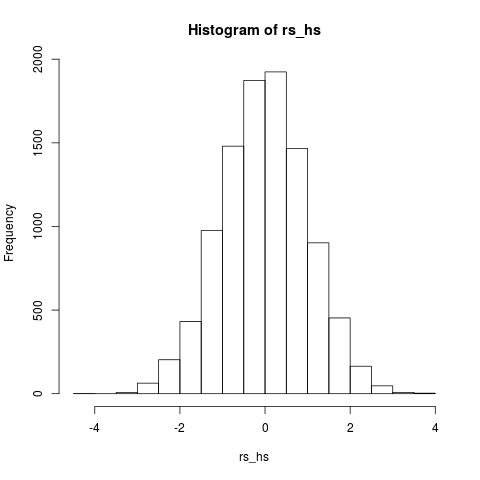

In [10]:
rs <- sample $ replicateM 10000 stdNormal :: IO [Double]
[rgraph|hist(rs_hs)|]

# Coin toss

Construct random variable for our custom type, using other predefined random variables.

In [11]:
import Data.Random.Distribution.Bernoulli (bernoulli)

We will use:

```haskell
bernoulli :: Distribution (Bernoulli b) a => b -> RVar a
```

which constructs random variable with Bernoulli distribution:

- it returns either of two values; `(True, False)` for us;
- `True` with probability `p` and `False` with probability `1-p` 

We will draw Boolean values, so for us it will specialize to:

```haskell
bernoulli :: Double -> RVar Bool
```

In [12]:
data Coin = Head | Tail deriving (Bounded, Enum, Show)

In [13]:
toss :: RVar Coin
toss = do
    x <- bernoulli 0.5
    case x of
        True -> return Head
        False -> return Tail

In [14]:
sample toss

Tail

We can make it simpler for those more familiar with monadic and applicative syntax:

In [15]:
bool2Coin :: Bool -> Coin
bool2Coin True = Head
bool2Coin False = Tail

In [16]:
toss = bernoulli 0.5 >>= return . bool2Coin

Line 1: Use <$>
Found:
bernoulli 0.5 >>= return . bool2Coin
Why not:
bool2Coin <$> bernoulli 0.5

In [17]:
toss = bool2Coin <$> bernoulli 0.5

In [18]:
xs <- fmap show <$> sample (replicateM 10000 toss)

In [19]:
[rprint| table(xs_hs) |]

xs_hs
Head Tail 
4948 5052

# Monty Hall problem

From [wiki]():

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

![img](Monty_open_door.svg.png)

In [20]:
import Data.Random.List (randomElement)
import Data.List

We start with types and utility functions:

In [21]:
data Result = Win | Loose deriving (Eq, Show)
data Door = First | Second | Third deriving (Bounded, Enum, Eq, Show)

result :: Door -> Door -> Result
result prize choice | prize == choice = Win
                    | otherwise       = Loose
doors = [minBound..maxBound]

Now, we implement two strategies:

In [22]:
mhChange :: RVar Result
mhChange = do
    prize <- randomElement doors
    choice <- randomElement doors
    opens <- randomElement (doors \\ [prize, choice])
    let change = head $ doors \\ [choice, opens]
    return $ result prize change

In [23]:
mhKeep :: RVar Result
mhKeep = do
    prize <- randomElement doors
    choice <- randomElement doors
    return $ result prize choice

In [24]:
mhKeep = result <$> randomElement doors <*> randomElement doors

Now, small utility function that compute frequency on `Win` results in the list:

In [25]:
winFreq :: [Result] -> Double
winFreq rs = let l = fromIntegral . length
                 w = l $ filter (==Win) rs
             in w / l rs

In [26]:
change <- sample $ replicateM 10000 mhChange
winFreq change

0.6637

In [27]:
keep <- sample $ replicateM 10000 mhKeep
winFreq keep

0.3333

# Compute $\pi$

A very basic (and inefficient) way to approximate $\pi$.

<img src="pi.jpg" width="400px">

In [28]:
inCircle :: Double -> Double -> Bool
inCircle x y = x^2 + y^2 <= 1

In [29]:
point = inCircle <$> stdUniform <*> stdUniform

In [30]:
areaMC :: [Bool] -> Double
areaMC ps = let l = fromIntegral . length 
            in l (filter id ps) / l ps

In [31]:
piMC n = (*4) . areaMC <$> sample (replicateM n point)

In [32]:
piMC 1000000

3.141092

# Stochastic processes

Let's just generalize type, in obvious way, *because we can*:

In [33]:
run :: Int -> (a -> RVar a) -> a -> RVar a
run n t s0 = t s0 >>= run (n-1) t

We may also need a variant that remembrs whole history (here, in reverse order, but it doesn't matter)

In [34]:
runH :: Int -> (a -> RVar a) -> a -> RVar [a]
runH n t x = runH' n t [x]

runH' :: Int -> (a -> RVar a) -> [a] -> RVar [a]
runH' 0 _ xs = return xs
runH' _ _ [] = return []
runH' n t h@(x:_) = do
  next <- t x
  runH' (n-1) t (next:h)

## Random walk

Now, we implement what we discussed:

In [35]:
type State = (Int, Int)

Randomly select one of 8 directions:

In [36]:
jump :: State -> RVar State
jump (x, y) = do
    (dx, dy) <- randomElement [(0, 1), (1, 1), (1, 0), (1, -1), 
                               (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    return (x + dx, y + dy)

In [37]:
path <- sample $ runH 10000 jump (0, 0)

In [38]:
import Control.Arrow

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nOxdB1gTyd+OIvZe6SDSpENom06y9F5CFRCEoKiIikZs2I29ooZT7KfGXrBhx3IK9noqNuxKwEYn8+1sEggQiuXO+/PlfXjIZnd2drLv7pRfJQAFWjQIv7sBCvyzUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7hUBDcwqEguIVDQXALh4LgFg4FwS0cCoJbOBQEt3AoCG7h+AmCPwgU+A9gV/k/RfCOML4Cvx/kx/8YwWk/fq4CvwxDFAS3bCgIbuFQENzCoSC4hUNBcAuHguAWDgXBLRwKgls4FAS3cCgIbuFQEPzzyODxFot+dyMagoLgn4ddVpZtye9uRENQEPzzYADgqiC4BUNM8MusrBNFv7sp9aEg+KexSmc9mJ8MDnYaPY768Xc3ph4UBP8s1gWXhm8EU8aCHd6ll/57DCsI/klkBFWAyrDNYFIy2B5UfpFa8LsbVAe/guCqT1Vy9v7/ILhybAX2v8y6rGgAimP7r6h1a2jlzcm/oqJfQHDJVP02BCW91NK6B/5/ECyB6zvmqV9Y3Tp00KVxv6aqnyY4wunMx/KCC34xdQ/8/yKYduJXVrdu42r7/wrB3V7jH9961z3Q0gk+mC3dGoqi/dRQsiPKXPSL6t4xHsROw7eGUBnUyp+p6qcJtsjAP/ZY1T3Q0glO2yHz5TX5ZnIOEA1d+GvqFnGi3YvxrTsk130/VdVPE5yjahw0JMhMLafugf9XBINXJHfsDojilvyayg/2WyDeKHGyfP1TNf38LLoii8/jZ1XU7DjKweEQ8VMN+29jLYdDQTkcfMpcPK8M+5/fDz7iVTHfP4u+ch5cr35Y1uML6SPOnwPx96PU3Ygy8Pd20TjeC2W+fM7DER344636r2Nx52PLu3TbkBeyHnvHPEf5Ywyv7oL3YVWfv7uyQkY62X+T5IsTXEgf773xPhK0Blt++fXPy3v2U039aYIfMG4+t1dSpr6oeyAp+Mdb9R/Hstihi1wW8OnnK9ibSr13gS2B5enho+sNUs3F2Va7ywO2iredTtMLT7CWTUKeVYb/ge1l/Gxbf5pg+9GlviNLSse51T3QcgleE12V0Hlx2J8FtJzyAIcdYCcftVNd5fSjBN8l3aBeLvPbDbCK+APLzzn0WhCp/QQb+0JsUb4Bn7+h7Gca+9MEd34L9B4BUNSl7oGWSzA1uupUr3gd5MXpKaDsMhg/DPfy+uPrj9V2H3kBTvS4gBGcrMLnYy/yqEl8/nPsQEVwK9Q8ls+39GvcQbBx/DTBTotEcXwAtlnWPdByCWYsi61a3ebOHdK2Kdi3iSk/VdnfCDbGno7tOB1MmCTuj8dcxT8qw5ejJh7Yhu+yoIpGKmgCP03wS1sjn9YMeq8LdQ+0YILB4nBklVvxLZ0ReXmTg+GM8nmdImLF8JdKUFbceF2PEKwzBqc7jzSOnQAVy0VSgisj1hR39kGwSblvYUbIj0+kf8Es+samBSv21f8dLZbg7K4AhJ4H+z2+enf1jiJQOaochDC/dpkouO55S35Z4ryq0bryEPz+nyb49G5/a7sxuKy96EV/SHDV4CGgWJPDMQNg5gyw7c0Pt/afUxe2VIIv0q0ASLiLTYn6rrhGfoCQbjGuUmyiFtcqBOfW7yhXS73CVjZW11PkIf552kc7hGzhQs6hvIvQc8MIrhoSNQ4Uu+HWIqKRc36iuQqCvxN/0T4ycIKromK8S3OIfi9JmuS3rsVDltUqVuK5lppT5iMQNEbwM+Rv8cbpASHWWm6IJuXdK1KA7lUg4iy+Uk0wECXMb6SSJqAguDGQXoDAvz45voPbj1BUh4iiDjSUiRGcBjYqo529ynjKtgMIBkRlJtMIFz2t6klhDYIb+e3PlfnboWZGqObyhqp3u4/9q4rtjfYm0PoRrHWxijqoMfstEg1rw2KQUab2W2B26wP5a2n//B/+CQqCG4M+KZ9MpZhKZEm7vKqV3gkOG9PsmHFb6BQjMskAIeuXgMrINQDw7ay8PrlgBQpoRm8DtwAgWLmx4TkwfD2rhtjaMuM30ckDKWR9hHSWdWqMvaOt3SjsULE+5b0NiWz43v/PH/8JCoIbA+M2yRi1tRETvNezxjY24UYg08ks5ai1i4Ud3YRib1IC1zXpa8Muj93phhFcSD/v77oRKyhgBjS8imXg6okVTmaTM61cLO0YJmSHR0WOZCdz1sbpYzCC3a5QTWh2Fq6bf+InKAhuDJqofoejr7ucBYdQFHWXWSkkITRCa2a7Ng69CGZahGP3lR9gOysDAyp2a6N9MIJd9lTY9YQWPGZuDcmhQlC05wuwpAtqqMRs2wbpCSvqP7AfakvoyGi1EaQ4oEyLsiOE/c91e6Fo3g//BAXBTUEUN418c8HB2js/UMer7gDnVEZa9Q2mqTD95+HL2Q0Z5+mFoBQj2JIW3Bc3v2t4ksUo8VxEeomN2pHeKeiIRMt+IbR+TL8+5eNU9LhqG8GVcXnIvABHFTrU40zObqiWJqEguAlAJf4rUlQdgsHCLoMxgkP6xDBMPBDU6jMukNrAoWGsQoKpniaOTRCMeO0Ct0iv+YMqD3fa9HfvGKaxF8KyRpInjonpHI0RzEYefrJ0pmQzChUE/2M4CETD+3MnF+frHZLsKduNzaS43KFdBhF8uOGE
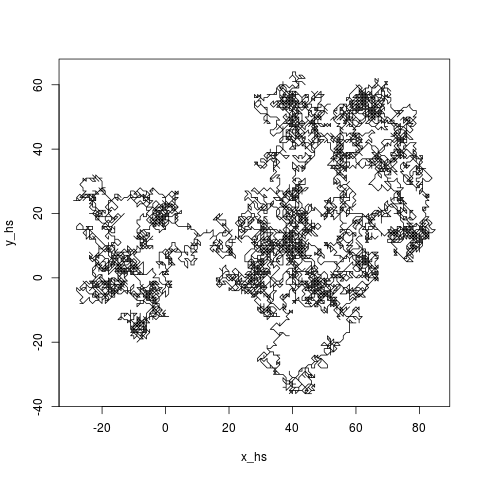

In [39]:
(x, y) = unzip $ map (fromIntegral *** fromIntegral) path :: ([Double], [Double])
[rgraph| plot(x_hs, y_hs, type='lines')|]

In [40]:
type State = (Double, Double)

In [41]:
jump :: State -> RVar State
jump (x, y) = do
    angle <- uniform 0 (2*pi)
    let (dx, dy) = (cos angle, sin angle)
    return (x + dx, y + dy)

In [42]:
path <- sample $ runH 10000 jump (0, 0)

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nOydBVyTzx/Hb8kGIzY6R3fnejTSDZLSGFgY2N0diPqzu/0ZP/Vvd3d3d6HSff/nGSECSgoy937peHZ3u+eefXZ99z0ARQg1oKMTIOL3IhJYyBEJLOSIBBZyRAILOSKBhRyRwEKOSGAhRySwkCMSWMgRCSzkiAQWckQCCzkigYUckcBCjkhgIUcksJAjEljIEQks5IgEFnJEAgs5IoGFHJHAQo5IYCFHJLCQIxJYyBEJLOSIBBZyRAILOSKBhRyRwEKOSGAhRySwkCMSWMgRCSzkiAQWckQCCzkigYUckcBCjkhgIUcksJAjEljIEQks5IgEFnJEAgs5IoGFHJHAQo5IYCFHJLCQIxJYyBEJLOSIBBZyRAILOSKBhRyRwEKOSGAhRySwkNMKgT9uFvEHsLXkdwm8KXKxiI6H/ei3Cbyg5Z8V0WYkigQWbkQCCzkigYUckcBCjkhgIUcksJAjEljIEQks5IgEFnJEAgs5QiXwi0vtfss/no4UuPjk66ZG9vH08lW/DPDhOISvdPY2Nb6/h44T+IqrbX+XsiZEVAJhPt1iefrgX4RZraWRtsrYsKI5Cfw76DiB85c4dxszufF47htHnYK5CT5FPXvOHNtwkP962MX4ABAgysD16dA6OH2yP/qnuK57Xk2iXhxZLQ0wsyBkADusBXUPhM+O148n1pLDkZV2FeXfBuhQgafizO5DWKRxs8bl5SfkpdTP2+vfcuSi4lvkkEgMTmXkw0yAl8IR7Sat8g2wrx+PqVIaj4t90fK0CjEdKnAG0JC7D1d071LjcsFmWhHsOfjOADU9mJtpOJB3U5t59KgeDyl/1ROzN5oHvIRJ338OMGdbkl1x9iN1cVLgW+WT9eIv7pfb8vQLCR0h8LvXcPgaJL9VMOn9VFgpusP0ovJn5VX6FYzQlJVlpgEyNdbhn3CtsNXy43raAQAwAFjySdq3IVy76HtMjtPmW1kT7FaqSYsZJ6QEPP7xPjnuhjktT7+Q0BECL7c+GZ4V4Vh4PoLP1wvqawCA/AzV6gr0rAsRY0PVlo+XZrDUfcVt5QCQBCgy9nis2DxYsWr292VkRrzemabSdu5HGc/cT8NrnjZsk9F3a3yHKxpLvqm6fpEV9aTlz9KJaXeBL669mxUodxQuklabH2JOMMFFAqwUAJHV/hVnesmhetL2erHNTPHAEFih2RcjL2ZFc0ucWD5RbHTIpcWCoOULpT2PGMkCTzv+JZhxGHW6TY6KdF168PiVUuTNUVM94hnk75EJXdkhK08zLrf8YTov7S7wQz0z21HmZXEpCi6aiqiSBGDd12LMjdppQvSUALL0HuZULJJ/SwbQVMmGAPAzEb+9+HhfqqoCA8I3FwKMfWZicfIYbb1MWM4qfYT0krwR6T8vnjKsL2NOLpyFp4A7EM6k9BO0v95w/saBrvYvoj+5hxCNUhUUgZXicaaCPDACvcqe2teuLOdf2iG70WOqpo0WHv0FSJuYdfXCAFswE/EbuguWaVAwcfCbqbS+R1KRlbFmDN5ibFfWlKHaGYJBkUqKlrLGTZjNlfgI4XRXhcoG9lvmy5Y/TmelA+rgk4HjFRQ4UVkTSARABPLpqb3tdR00D/8Q5oGMNV1eVpDDiY6l8IKfNBYLSEveDmWHOzKVcaBbV2eJCV0cVeXxGGCx0cZ71APWhsm7f4iifB2LnfdvYNnbCXNPnhG45Ifa1OtyCz0dIHDgg7d3y+GQMc6pnjhg7siU8Nw5wlql6/TaYZ57LwpU05QApp4AyC6H7/vQFNTF1FU8d1fAEhXrQWycFFpNuxgtHqROtPkHlnrpPVzJ/FrnRuVIJynLCmN4uup9kTzoU/K3tavbX+DrRKuQFRCW9bwMX6lZxkhh4tAe0kfI/QpfP0AaWYd65+R37QcM8SS3hb20nZAe8NPt7H0fCs8BQmWv1vIBjF0lYbvhCVzvcgMDdKwlsmA/SY/hhQ3ebsii0u/XWHlbi74zDiGXJR9KGwwudLS/wBkHDo3Yg3SKnpyEaWe/jGYcqnJfE+ASwD2+027A0qBJlKNIu9rh8zRr6VPj6AVwl4EVfX4ZU/qsIOAkvz7Ww0aJX8wd6V8AOXYejy303+UbGY5qPEmv/LXBqotsE7jEXkPWN7/lz9aJaAuBy7+VN+D6M4H17Xv8k8rhc0yNnH7IRCX/5sAvTv2Vk98Mx5L4BBlAllCeYFqQL94X5miRxefn6oNItHwtnCcXpZuQRjBlrEd+JounZUPFdDjH2ESs8YmLBQx14OJE14fvmRHG8fy6RbpQ0mqBC0fp4QFOd3RRXY+fCfxB8Fqcp+3Kq+/5beGYXlwiyVXXzo0oIScjTXCsYAVW+KSznc01JcZtpC8rWaukyONJDrv0SPN/6AeKGIXlSgVLY8ph/peG7lZaa8r5TJeXLEs8hWgB4XqgL+3060cXElotcIzbsU8ln08HJtT1aGQs+o6+5YSfeA31xc4/TFAm+WsBquVpowDj3kM4GICdeWXkoFg9Ng4Y5L9mFkPlyuZS1ox83Kiwn1WoHzaJ9fkEYQ7Sei6YJD/eLOmVsw828+t91Y3hrrrvGn04IaDVAktXDgbmy9X1aGyy4bWpb3b1tUCfE9VZcIa6FDMLCwiCEUpzpAMsidWRXEmfwdf4DF8s2PEUCTJ9DUxCg54vLHNdD7o2VEUICMFiuvM5jj6uPHcNef24xVlMA/rYJU6Wij0WaJPHNPpwQkCrBbZYLviz3aquRyMCV3heqLle0xfC7PAAnYgTyJtTh2GgzESBuDjkv4SaPKDFi63Z5r6SPcWismH0FH50R/9ec3ZhDltGMd3/s5uUTfLsMb/ysuAzvNwHwk+6DpZTppgbkmUP/B194lYLfFHZOCwx
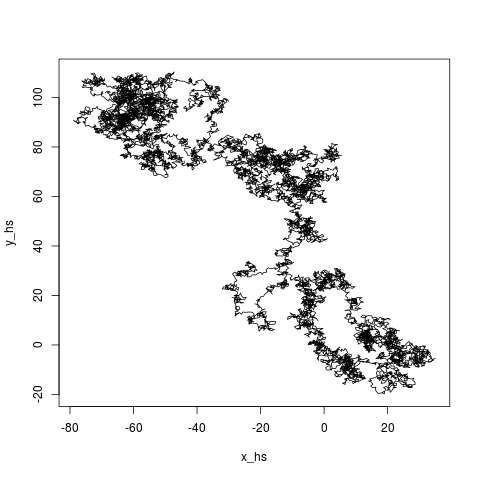

In [43]:
(x, y) = unzip path
[rgraph| plot(x_hs, y_hs, type='lines')|]

## Snakes & ladders

In [44]:
import qualified Data.Vector as V

In [45]:
ladders = [(11, 43), (25, 54), (40, 81),
           (60, 79), (73, 88)]
snakes = [(37, 2), (46, 20), (55, 29),
          (61, 8), (68, 13), (72, 49),
          (75, 22), (87, 67), (90, 77),
          (94, 31), (96, 11)]

board = V.fromList [0..100] V.// ladders V.// snakes

In [46]:
runUntil :: (a -> Bool) -> (a -> RVar a) -> a -> RVar a
runUntil f t x
  | f x = return x
  | otherwise = t x >>= runUntil f t

In [47]:
count :: (a -> RVar a) -> (Int, a) -> RVar (Int, a)
count t (k, x) = t x >>= \x' -> return (k+1, x')

In [48]:
move k x = randomElement [1..k] >>= return . go x
    where
        go x i | x+i <= 100 = board V.! (x+i)
               | otherwise  = x
game k = fst <$> runUntil ((== 100) . snd) (count (move k)) (0, 0)

In [49]:
sample (game 6)

25

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWWlpaYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+QAZCIAAASSklEQVR4nO3df3wU5YHH8ScEDsgPEggtQoBcgwEkQgTkUAoYCWhPOAkWtNYq5dRT64GHoL0eWLSFCnLoeeQ4q/WuUBHBH7TaKD8sGK+hJ4o1nJBSRKCShAjIrwTy/HeT3Wcmye6Gmd2dyc7z3e/n9RKG+fHMJG9J9mF3M0Iy6ESiL4B5G4HBIzB4BAaPwOARGDwCg0dg8AgMHoHBIzB4BAaPwOARGDwCg0dg8AgMHoHBIzB4BAaPwOARGDwCg6cpcKMQ+4zfbhJLpRCNbo36h4JOT1t/2COGSDlEbIy451mR6tZJPQ4LeLSoiGfUO8T47dYfCJzIWgGfOtVkrY4T+CaxoeUPBE5kLcCBT/WOCRm9p+4xfIVYK0/OvTytaI2hXndrz5Evi9HyqMh5b/R6WX5NRvakXXKfyF/Zb+CqipHp11UHBzMPaD78nwNrjk7PHrGmDbA6g5lx1rdGZN5SH7bBd+kLPLSoqCgzCFzTI+XmiaLf6c1/LRYfaCoWA27qLlbIpnFiZGnXAHD6ALH+s+6pxWPEgKZ9QvzVEOO/QemiNDCWdcDmIjH3g8DohWLAyE6tgc0zmOc/K0S3YZ3Ew2EbfJe+wMECwO+Igr/IebfsC3yJ3ioGnJTbRdbFbWLoeflYAFgsrT237YYl8nw3ccwArpITxW1NW8SgwFjWAcYXhCDnBlF4uune1sDWGVQG8Aa5UkwI2+C79AVu9SW6tpdIGfvY0eD34GfE/caWXHHwaTFPyj8GgLtdNFb930+mDxTi6D6RK+XtYo3xtTovMJZ1gAW8SCyScltrYOsMqrMi5YLcaYwdusF3QQDL+iVXCdHj01bAA0X1z8RcKT8Ofg821rzXJe321RnNwHnNwM+HABsHWMA/Eoul/F2b78HmGVSBs1YYY4du8F0QwBvufFH+eZx42gDeIbeIgScNnR4XN4lBX8mHLeD5YoH8g4gAbB1gAa8Tw8/I+1sDW2dQWcChG3wXBPA7olvpt9PENuNb64yPmyaKgVPTxFPyfL4YYDwwNoGXi6xpX08Rn4cBWwdYwMaReaNEEHhAodGvrTOoLODQDb4LAliuG9MjbcTzUr7Sx5gmnXgwP63oOWOaVD05c9h/WMBfzUi74pfFoiwMuOUAE1ge/FaPYU8FgQOttc6gavkSHbLBd2kK7KTaig+bEW5I9HUkNmDgTzunLFpZIJ5L9HUkNmBgWT4xK/2qNU32Ozpuozn9Xu/ioN6GDMwkgeEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAyeB8DvLjP72P3BWZR5AHz/f5YH+/FK9wdnUeYF8B/VwiYCJz4Cg0dg8AgMHoHBIzB4BAaPwOARGDwCg0dg8AgMHoHBIzB4BAaPwOARGDwCg0dg8AgMniPgiycuRjEkgf2UPfDZRQWdRerli885HZLAfsoe+I7J22ob6naWft/pkAT2U/bAWUcCv53u7XRIAvspe+Cinwd+e2Wk0yEJ7KfsgSv7Dps1Z9bwfpVOhySwn3LwKLqxvGxZWXmj4yEJ7Kc4TQKP0yTwOE0Cj9Mk8DhNAo/TJPBimSa9eU+gmS9E3p/AfiqWadKp6kDPrIq8N4H9VBzTpF89G/kAAvupOKZJBNahOKZJBNahOKZJBNahOKZJBNahOJ5NIrAOOZkmHW8yfrlQE7qawDpkD/xJYUr+61IeCNuTwDpkDzzxX85vz91FYE2zB+5+0qC6+gKB9cweePAbUjZN/yGB9cweeGPG+C9kzcgiAmuZg0fRRzcaX6TPrVsQup7AOhTHm88IrENeApdNWqj6ZexnYfHlJfCjxbuC7fxW7Gdh8eUp8HS1cIbACYvA4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBi+OG0QTWIe8vPMZgX2Ql3c+I7AP8vLOZwT2QV7e+YzAPsjLO58R2Ad5eeczAvsgTpPA4zQJPE6TwOM0CTxOk8DjNAm8WKZJL5cEGv5Q5P0J7KccPl14rD58Hf8G65A98NTP5KFrOnW5/nDoBgLrkD1w1yo5667TDQtKQzcQWIccAefvlbK+R+gGAuuQA+AtjdM2S/luv9ANBNYhe+DJA7tmD5Vbs8PuFUtgHXLyKLph/w75/taw1QTWIb6qEjwCg2cPXGUWuoHAOmQPPFak5QYK3UBgHbIHbpr9QOQNBNYhB9+D314eeT2BdYgPssAjMHgEBo/A4BEYPAKDR2DwCAwegcEjMHgEBo/A4CngB7dfiPpQAuuQAl40os9974S/if+SRQE85bjqTCzXyOLI+hJd/dSEPne/1RDFoc6Bv+xaouobyzWyOLKA69ff1bPw2n6vOD/UOXDd18xtxdFeH4szBfxkcfqUZ/4k5dbLnB9KYB1SwLM3nAz8/hX/BoOlgM8/Wy43Lg/7OSuXjMA6pIC/N6pS7v7m7KgOJbAOKeCMauOXg1lRHUpgHVLAg943fqnIj+pQAuuQAl6b8+CKeb1fiOpQAuuQOQ/eu+TeRbujO5TAOtQhTzYQOHEp4LevHdJcVIcSWIcU8MCFeyK9gfCSEViHFHDfGJ7mIbAOKeDlS6N8rlASWI8U8DfTMwfzezBiCridN/FfMgLrkDVNunCkKcpDCaxDCvhISfeMA2OrozqUwDqkgG/7h9N9Li6aFNWhBNYhBdyrXvaRx9OiOpTAOqSAR7xuAG8pjOpQAuuQAt6W8+3ud33tN1EdSmAdMh9F177w+Joj0R1KYB3is0ng
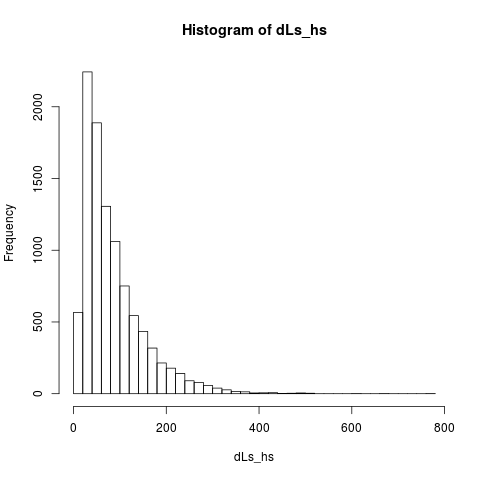

In [50]:
ls <- sample $ replicateM 10000 (game 6)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC61BMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJERERFRUVGRkZHR0dISEhJSUlLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWWlpaXl5eYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////70cMsAAATKklEQVR4nO3df3wU9Z3H8W8IXsjvhGgRYkIbJCiRhIgYkF+BoBVTQVSO41Q4ldZaKvaKaK8Gi60oQsXaSqPt9VpUxOBBWy8YQgumFqxy9FxbjBRQfiUQRX4kJuT7583ufr+TZGd3Z2d3Jjvfz76fj4cwzu/lBbv7TTYzjANpLN4nAM5CYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4RQN3MrZf+20We4Iz1mnXXt8ZOWCd/j/72CjOR7G6oGueZ8l2HdRhtAKPY02x7PUONnmH/j8IHE+9An/+ebc+O8bAs9imnv9B4HjqCez7o945JePim/ZpfRnbwE8/cHlaWa1W/eS83PJX2Th+lOW9NW4jr5+QkTNjD9/PitYOK3ymqTx9WrN/Z3ID7+b/4ZtzdHZOaW2fwOIIknbUN0oz57YZFriOuoGvKCsry/QHbslKunkqG3b2t19mKw50V7KCWansad59HSufk+ILnF7ANh5KTa4czwq69zP2T6O0/0akszm+fekb/LaMPfCub+8lrKB8QO/A8gjy+OcZGzR6AFtmWOA66gb28wV+k408xpfO3e97it7OCk7zHSz7QiO7ooM/5gvMnmhtb7xhJe8YxE5ogT18Kpvf3cBG+Palb6A9IfhzbmIlZ7u/3juwfgRBC7yJr2VTDAtcR93AvZ6iWwezpIrHjvpfg59l39SW5LOD69hSzv/PF3jQBW3W3344u5Cxo/tZPucLWK32XD3cty99Az1wDavhvLF3YP0IwnmW1MV3afsOXOA6JALztpVjGcv6e6/Ahaz5SfYA53/1vwZrc966KG3B8xnewMO9gX8REFjbQA/8fbaC8z/2eQ2WRxB8R23S9h24wHVIBN5016/4P65j67TAO3kDKzyt1cm6sJmNOMOX6YG/yx7i77AggfUN9MAvsTHn+Dd7B9aPIOiBAxe4DonAb7JBc25NY43aS+stf+2eygpvSmNreEcRK9DeGMvAq1l29ZeS2MeGwPoGemBty+FXM3/gghLN7/QjCHrgwAWuQyIwf2l8VlrpLzh/bYg2TPpsSVFa2QvaMKl5Zubon+uBz9ySduVvKtl6Q+CeDWRgfvDGrNFr/IF9NuhHEHqeogMWuI6igSPR2rTXG+GGeJ9HfBEO/PeBSTVrR7IX4n0e8UU4MK+fmp0+trbbfMWI1cnh90Ybd+osyoGBIzB5CEwcAhOHwMQhMHEITBwCE4fAxCEwcQhMHAITh8DEITBxCEwcAhOHwMQhMHEITBwCE4fAxCEwcQhMHAITF1HgC59dcPo8wCHmgc/XjBzIki9f0d4PZwO2Mw98x8zG1i9O7przb/1wNmA788DZR3y/nb3Y6VMBJ5gHLnvR99tr5U6fCjjBPPDuoaNvv/v2McN298PZgO0ieBfdWb9+1fp62y4ICf0KwyTiMEwiztFh0m9WSS6+mCNxjg6TJtULK9dY3xhs4egwqVJOvI7A8eLoMAmB4y+aYdKrVT7jTashcPxFMkw65b0SUVdL4OyXnzPbEIHjzzzw+yVJRVs4P2BYE4FVYB546qMdO/L3xBZ4w52vCP9j+QwhJuaBU09zvvmarpgCf/9KOSAutnyGEBPzwMVbOe+e/b3YAlcbZkH/MA9clzH5OG8pL0NgJUXwLvponfYk3f7SQ4HzEVgFMXyqEoFVgMDEmQf2SIELEFgF5oErWFq+T+ACBFaBeeDuRfcHX4DAKojgNXjb6uDzowqcUyVc/WQkpwex6u83WTlyYtvK6I8MkUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiYtb4JenLBcei/4UwFQMV5uNLfDq8XuE8biUrYNiuNpsjIFnyKkZCOwg88AhrzaLwCowDxzyarMIrALzwCGvNovAKjAPHPJqswisggjeRYe6KQcCqyB+wyQE7hcYJhGHYRJxGCYRh2EScRgmERfNMEnclGPMg2ZbInD8YZhEHIZJxGGYRByGScRhmEQchknE4btJxMXtU5UI3D8QmDjzwPbelAOB+5l5YHtvyoHA/cw8sL035UDgfhbBa7C9N+WQEwjcP/AmizgEJg6BiUNg4hCYOAQmzgWBK1tPCV9EfzIQggsCD557m9+MR6M/GQjBBYFz5Xci33ok+pOBEBCYOAQmDoGJQ2DiEJg4BCYOgYlDYOIQmDgEJg6BiUNg4hCYOAQmDoGJQ2DiEJg4BCYOgYlDYOJccKU7BHaSC650h8BOcsGV7hDYSS640h0CO8kFV7pDYCe54Ep3COwkF1zpDoGdhGEScRgmEYdhEnHRDJNsvikHAjsJwyTiMEwiDsMk4iL8duGnbcZ5CKwC88DvT5/bWp2SPO1w4AIEVoF54Kn3fzfv4fbzS6sDFyCwCswDpx47nXSe87bMwAUIrALzwIXbmtjbnDeOClyAwCowD/zTi7J+OuzuRTkbAxcgsAoieBe9/wj3PPXEPsN8BFYBPlVJHAITh8DEuSnwf+VVCSPPRX9a0IebAtdOlLOqT0d/WtAHAhOHwMQhMHEITBwCE4fAxCEwcSLwkh1dljdFYBWIwDWlQ+570/i5urAQWAX6U3TzmilD7n3Dyr3HEFgFeuC2jQtzSyYOey3yTRFYBSLwU5Xp1z/7EefbL418UwRWgQi8aJP/j/QM/gUTIwJ3PFfP61YbfkI0LARWgQh859W7+XuTFlnaFIFVIAJnNGu/HMy2tCkCq0AEHvEn7ZemIkubIrAKROANeUueXnrxLy1tisAqkOPgD1Z+veY9a5sisArwzQbiROBtE0d5Wdo0VOCOZkkPhsBxIwIXLt/n0VjaNFTgl6csFtLk
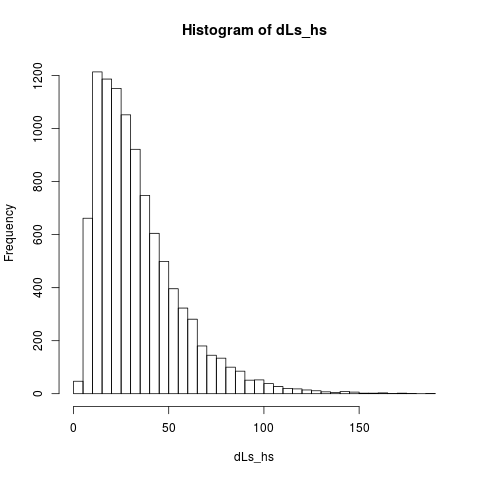

In [51]:
ls <- sample $ replicateM 10000 (game 20)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

### Snakes & ladders with infinite tree

Nice, bit leaks memory.

In [25]:
import Data.Tree

In [26]:
ladders = [(11, 43), (25, 54), (40, 81), 
           (60, 79), (73, 88)]
snakes = [(37, 2), (46, 20), (55, 29), 
          (61, 8), (68, 13), (72, 49), 
          (75, 22), (87, 67), (90, 77),
          (94, 31), (96, 11)]

board = V.fromList [0..100] V.// ladders V.// snakes

In [27]:
board

[0,1,2,3,4,5,6,7,8,9,10,43,12,13,14,15,16,17,18,19,20,21,22,23,24,54,26,27,28,29,30,31,32,33,34,35,36,2,38,39,81,41,42,43,44,45,20,47,48,49,50,51,52,53,54,29,56,57,58,59,79,8,62,63,64,65,66,67,13,69,70,71,49,88,74,22,76,77,78,79,80,81,82,83,84,85,86,67,88,89,77,91,92,93,31,95,11,97,98,99,100]

In [28]:
snakeSpace :: Int -> Int -> Tree Int
snakeSpace _ 100 = Node 100 []
snakeSpace k x = Node x (fmap go [1..k])
  where
    go i | x+i <= 100 = snakeSpace k (board V.! (x+i)) 
         | otherwise = snakeSpace k x

In [29]:
win (Node 100 _) = True
win _ = False

In [30]:
randomTreeWalk (Node _ next) = randomElement next

move :: (Int, Tree a) -> RVar (Int, Tree a)
move (k, s) = randomTreeWalk s >>= \n -> return (k+1, n)   

In [31]:
runUntil :: (a -> Bool) -> (a -> RVar a) -> a -> RVar a
runUntil f t x
  | f x = return x
  | otherwise = t x >>= runUntil f t

In [36]:
game k = fst <$> runUntil (win . snd) move (0, snakeSpace k 0)

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC61BMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJ0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///9fDAU/AAASwklEQVR4nO3deXxU5b3H8YcEGsgOoaUkJGhYSwqRpGwCBg3aVpDFGsvFKrXUixaxFVvlhhZrxbJU2+utaYp62wsFWazQ9oZVg7ENLlxahwIpAgKFBKaELes8f96TyZlnJrNwznNmJnOe33w/r5dwOGd+MwfeMpOHTHIYR6RjsT4BFN0ATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABNPUeBWxo5qP93NnueMtUbqXt8flvCS+MUhNoLzEWxr0FteZ4mRetAoRwu4mNWEc68PsMn7xC8AHMt8gC9fdondYQLfzTZ7fwHgWOYFdv9RV09J7T/jkObL2Hre+PjQ5MJKTf3C/X3HvsGK+VmW9W7xJl41ITXz9gP8KMtfm533Ys3YlNvqOu/MM9Ax/ox7z9nZmWMquwDrj+BJe9Q/jUm71xlwwHapCzyysLAwrRO4Pr3HrKks++qOm9jy464Slnt3H7aauyaxsXOS3MApuWzTyT6JJeNYrusoY58Zof03JIXNcd+XGNhRyB7/0H3vBSx3bIIvsOcRPI9/nbHeoxLYkwEHbJe6wJ25gXexYf/kS+496n6K3sNyG/k+ltG+l41s5j90A7PnG5r23rWCN/dm5zVgB5/K5rl2syHu+xID2hNCJ+dmVnDV9YgvsHgEPQ14M1/LpgQcsF3qAvs8RTf0Yz3G//Bs52vwz9mj2pEcduIltoTzv7mBe7dru/7+3Ow8xs4eZTmcz2eV2nP1YPd9iQEBXM7KOd/rCyweQe8669HG92v37X/AdpEA5s4VtzCWfsQHOI/VvcAe5/yvna/B2p53eyXPfyW1A3hwB/BrfsDagABexpZz/k6X12DPI+i5H7VGu2//A7aLBPDmB3/DP5nEXtKAq/lulteo6aS3b2NDrvAnBfD32FL+PgsCLAYE8AY2+hp/1BdYPIKeAPY/YLtIAO9ived8LZnt1V5a5/7VNZXlzUhma3hzPsvVPjD2AK9iGTM/14N9GgAsBgSwNjm4iHUC5xZo/UE8gp4A9j9gu0gA8w3j0pPHvMb5lgHaMunS4vzkwnXaMqluetqoXwngK3OTv/A/JawiANg74AHmJ76SPmpNJ7C79eIR9LxP0X4HbJeiwGZqqDnYgXBXrM8jthEGPtKzR/naYWxdrM8jthEG5lVTM1JuqXQZ39B0Wz3L700RvNPoRhkYcQCTD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATLyoAK9bKVofjftH5osK8Lgq0a3RuH9kvqgAlwTdRLEIwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPFPA7Zfape4UwPbJGPh6+bCeLHHo8ibzdwpg+2QM/MD0vQ0tF/bP+ab5OwWwfTIGzjjj/ulqf/N3CmD7ZAxc+Kr7py1jzd8pgO2TMXDtwFFlD5eNzq41f6cAtk8mPopurapYWVHVKnGnALZPWCYRD8sk4mGZRDwsk4iHZRLxsEwiHpZJxLOyTHqj1F3RilC3B7B9CmOZ9LuXQ40A2D6FsUwCsAqFsUwCsAqFsUwCsAqFsUwCsAqFsUwCsAqZWSZddGk/tNX77wawChkDf1zQI/8tzo8H3BLAKmQMPPU/mvflHACwohkD92nkfNuX2gCsZsbAw7dz7pr9NIDVzBh4a+rkc7x+bCGAlczER9Fnt2pP0k0blvrvB7AKhfHFZwBWIQATD8DEAzDxAEw8ABMPwMQDMPGiDTypThTw+UbUDUUbuM+3RVOtPxSyXLSBM4PuRd0WgIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4oVx9VEAq1C0L6sD4BgX7cvqADjGRfuyOgCOcdG+rA6AY1y0L6sD4BgX7cvqADjGYZlEPCyTiIdlEvGwTCIelknEwzKJeFaWSUc2unviuVATALZPJj9deN7p84uDFe4W/ijUrQFsn4yBZ5zkpyYk9Jp22v8AnqJVyBg4ycHLHrrasnSO/wEAq5Ap4PzDnDvT/Q8AWIVMAO9unbmD87ez/Q8AWIWMgafnJWWO5Hsy1/ofALAKmfkouuVYNX9vT8BuAKsQ3lVJPAATzxjY4cn/AIBVyBh4PEvOced/AMAqZAzsWvBY8AMAViETr8E7VwXfD2AVwgdZxAMw8QBMPB148b426VEAq5AOXD5mwKJdge9tv2EAViHxFF23ZsqAhX9qkRiVBe5d7KlottQ5ojASwM5ND/UtmJi9xfyoLLB3s+0O84+CwksH/mlJyp0//wfnez5vfhTAKqQDL9jc6P75Cv4GE0sHbn65im9dFfDlRzcMwCqkA3+jqJZ/dOsCqVEAq5AOnFqn/XAiQ2oUwCqkAw95T/uhJl9qFMAqpAOvz1q8ekn/16VGAaxCnnXw4RWPlH8kNwpgFerGTzYAOBbpwDsnjuhIahTAKqQD5z11KNj76m4YgFVIBx54TX4UwCqkA696XvJzhRzAaqQD35qSNhyvwRTTgUO8t/2GAViFxDKp7YxLchTAKqQDnyntk3p8fJ3UKIBVSAee9+9XB7SX3y41CmAV0oH7OfkAfjFZahTAKqQDj3lLA95dIDUKYBXSgfdmfa3PQ5/9o9QogFXI81F0w+vPVp6RGwWwCuGzScTTgcd3JjUKYBXSgWtqat7deNtGqVEAq5Dv
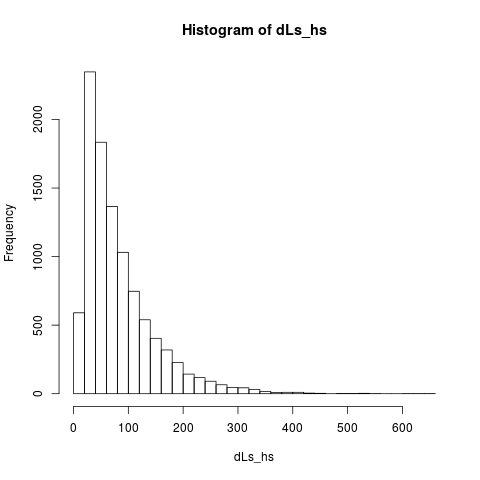

In [43]:
ls <- sample $ replicateM 10000 (game 6)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKCioqKlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///+iQ0kAAAATX0lEQVR4nO2de5gU1ZmHz4AuMBdmYFSEYSByG2SE4RLlPowsYgyycjG6ijEsYlaNK9kNoq6iK9lFRYiaGCezxGSFFRGMJCZchAiOWUjERWlXnBDEcJubDHcY+vy31XVON9MXurqqT1fV+fr3Pg+cp86p89Wpeae765uu/ppxQBrm9QJAZoFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EE0dTwecY22M0U9hiztg5VVH/2L/di5GNXayM8zK2JuGep1h7VQfNMLQEj2C16US9i43bEtmAYC9pI/jYsWCkO03BU9jqCxsQ7CUXBJs/6q3j8y+7eZfhl7EVvOWhfrkVNYb1xtu7DHuDjeAHWfH7I1bx9aPyiybu4HtYn2U9er1QOyxvQp0IFp4Qmv6vZs/BaUVDaqIEyyOEMY76uyEFM5vjBnyHvoIHVlRUFAjB9Z1zbqlkPU78+mvsyb3BKlY6pRN7ngfHsGHTO5iC80rZqi86ta+6lpUG9zD2N2XGv755bLoZKzLh1xXsoQ/N6OWsdFi7toLDRwgf/xRjHQe1Y/PjBnyHvoIFpuCNrP8hPm/mHvMp+l1W2sK3sMLzm9nAM/wpUzBb3HB6841P8zMd2RFDcIBXsjuCm1hfM1ZkgvGEIHSuZuUngt9tKzhyBIkheDVfxsbHDfgOfQW3eYpu6MpyRj51ULwGv8TuN0ZK2L4X2TzOPzEFdzxvdP3fv0/rxdjBPayE81msxniu7m3GikyICF7IFnK+ua3gyBEkp1hOK99mxI4d8B0kBPPmp4cy1vmzNoJ7sbpn2UOcfyxeg42e9y/NnfVKfkhw75DgV2MEGxMigh9nT3L+XtRrcPgIEvOotUbs2AHfQULw6rt/yf8yhr1oCN7KN7FeLYadzufXsr7H+fyI4B+wh/kfWQLBkQkRwSvZ4JP8/raCI0eQRATHDvgOEoI3so7Tb81lm42X1hkfBytZr5tz2VJ+pg8rNS6Mw4KXsMKpV+SwL+MERyZEBBszew9nQnBpucFvIkeQRATHDvgOEoL5yms75w55lfM3uxlp0tEH++RWLDfSpLobCgb9LCL4+Izcq1+rYtVxgi9MCAvm+27qPGipEGyyInIEyYWn6JgB36Gp4FRoqP0oJOFGr9fhLYQFf3ZJzsJl/dlyr9fhLYQF8/WVhXlDa4LWO6bMmnD6vUph0MxCWTDgEEweCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgZF/zGM4LfZvpAICEZF1y53mT1zEwfCCQkJcHnj553fIAq0TRAsDdYCz61sP8lrH2/J087OwAEe4u14Ltu2NxwtnHb9H9wdgAI9hZrwYUHzObEZc4OAMHeYi244udm8+YwZweAYG+xFry9+6Db5tw2uMd2ZweAYG9J4Sr63PrqZ6rXO/3uGgj2FqRJxEGaRBykScRBmkQcpEnEQZpEHCdp0q5qk+c/SOUAEOwtqaRJTaGi6a31ke1PhOC5P0zlABDsLdaCd5fn9Hmb871xe/73T1I5AAR7i7XgyifObCnZAcGaYi24Uwvna7/eCsF6Yi14wDrOg9Mesyv4gwWCq8QmBHuEteA1+eMO8/phFTYFL/7xDpMCsQnBHpHCVfTBNcaT9OmVD8f2Wwh+R7RFooFgj0jjrkoI1gEIJo614ECY2AEI1gFrwSNZbolJ7AAE64C14ODsBxIPQLAOpPAavGFJ4n4I1gFcZBEHgokDwcRxS/DBgeJP049+6vyAwAFuCf7sMvE54fmvOj8gcIBrgmUa/SoEuwsEEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgomTRq1KCNaBNGpVQrAOpFGrEoJ1II1alY4Evzxf3D77np1FAuekUavSkeB7hogb4Msa7awSOCaNWpWOBM+ZI9qZDTYWCZyTRkl/CNYBt9MkCHYZt9MkCHYZt9MkCHYZt9MkCHYZt9MkCHYZpEnEcZIm7Rd/jHr82WSzINgfOEmTPhBf2n7nE8nmQLA/QJpEHKRJxEGaRBykScRBmkQcvJtEHLfvqoRgl4Fg4rhV0h+CPcKtkv4Q7BFulfSHYI9wq6Q/BHsELrKIA8HEgWDiQDBxIJg4Xgn+2+Wvm2xzfnyQCl4JLllUbVLp/PggFTwTvEe0Vc6PD1IBgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxvKoXDcEu4VUhNAh2Ca8KoUGwS3hVCA2CXcKrQmgQ7BJeFUKDYJfwqhAaBLsE0iTiIE0ijpM0qaXO5KUXkk2DYH/gJE367b0mkxYkmwbB/gBpEnGQJhEHaRJxUny78Kvm+D4I1gFrwbuvn9kwtUP7CftjByBYB6wFVz7wg+JHTp+aNzV2AIJ1wFpwp0MtOac4by6IHYBgHbAW3GtDLfsD55vLYgcgWAesBb98aeeXe8yZXbQqdgCCdSCFq+g9B3jgucW74vohWAdwVyVxvBY8WrxxUXfW+TpAMrwW3FG8cXHTc87XAZLhtWA5/M5i5+sAyZCCH9zSansqBOuAFLxwSLf7Nsa/n5AUCNaByFN03dLx3eb+zs61DgTrQERw86rvdCkf3ePN1KdCsA5Iwc9V5U1+6c+cv3tl6lMhWAek4NmrW8z2OB7BxJCCz/xkPV+zJO7O2KRAsA5Iwd8evp3vHDvb1lQI1gEpOL/O+G9foa2pEKwDUnDfD4z/avvYmppY8KlV4huv7pRv
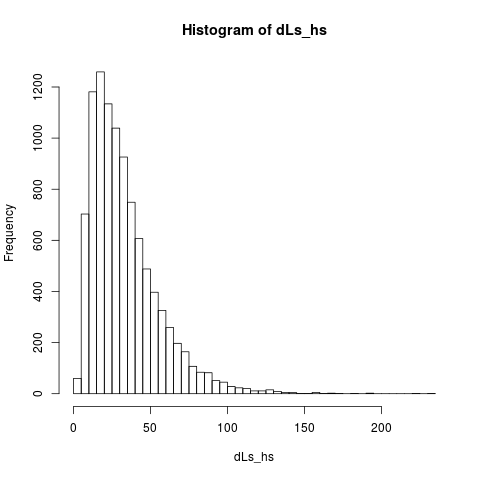

In [42]:
ls <- sample $ replicateM 10000 (game 20)
dLs = fmap fromIntegral ls :: [Double]
[rgraph| hist(dLs_hs, breaks=40)|]

# `Num` typeclass

Don't think so. Confusing. Sometime you want to add different, sometimes you want to multiply the same. Can be pretty confusing with stadard syntax.

In [49]:
:ex TypeSynonymInstances
:ex FlexibleInstances

In [51]:
import Control.Applicative

In [61]:
instance Num a => Num (RVar a) where
  (+) = liftA2 (+)
  (*) = liftA2 (*)
  negate = fmap negate
  abs = fmap abs
  signum = fmap abs
  fromInteger = return . fromInteger

In [75]:
dice2 = randomElement [1..6] + randomElement [1..6]

In [76]:
sample dice2

7